<a href="https://colab.research.google.com/github/vicentew13/vicentew13/blob/Projects/Celsius_a_fahrenheit_basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import packages
import numpy as np
import tensorflow as tf

In [ ]:
#array de grados celsius y fahrenheit

celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [ ]:
#diseño de capas usando el framework keras

capa = tf.keras.layers.Dense(units=1, input_shape=[1])#las capas densas tienen conexiones de cada neurona a todas las neuronas de la siguinte
modelo =  tf.keras.Sequential([capa])

In [ ]:
#propiedades para compilar y realizar el aprendizaje

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), #el modelo y la taza en la que el aprendizaje se ajusta para obtener mejores resultados
    loss = 'mean_squared_error' #perdide error cuadratico medio los pocos pero grandes errores son mas importantes que muchos pequeños
    )

In [ ]:
#entrenamiento del algoritmo

historial = modelo.fit(celsius, fahrenheit, epochs= 1000, verbose=False)

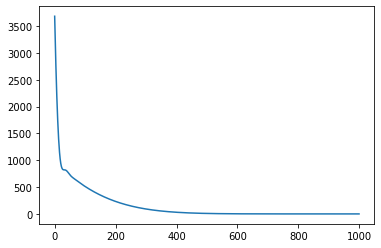

In [ ]:
#visualizamos la funcion de perdida para ver como se perfecciono el algoritmo
import matplotlib.pyplot as plt

plt.plot(historial.history['loss'])


In [ ]:
#realizamos una prediccion

xr = 100.0
resultado = modelo.predict([xr])

print(f'El resultado fue {resultado} pero deberia haber sido ', xr * 1.8 + 32)

El resultado fue [[211.74281]] pero deberia haber sido  212.0


In [ ]:
#Ahora debido a que es un modelos simple analizamos cuales fueron los valores de los sesgos y pesos

print(capa.get_weights())

[array([[1.7982235]], dtype=float32), array([31.920456], dtype=float32)]


In [ ]:
#Agregamos dos capas con tres neuronas para ver si mejora el sistema

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo2 =  tf.keras.Sequential([oculta1,oculta2,salida])


In [ ]:
modelo2.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), 
    loss = 'mean_squared_error' 
    )

In [ ]:
historial2 = modelo2.fit(celsius, fahrenheit, epochs= 1000, verbose=False)

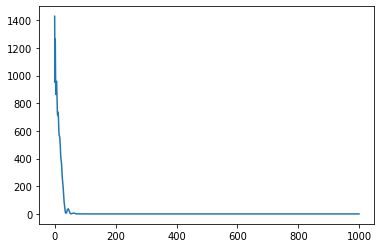

In [ ]:
plt.plot(historial2.history['loss'])

In [ ]:
xr = 100.0
resultado = modelo2.predict([xr])

print(f'El resultado fue {resultado} pero deberia haber sido ', xr * 1.8 + 32)

El resultado fue [[211.74739]] pero deberia haber sido  212.0


In [ ]:
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

[array([[-0.35676903,  0.36861396,  0.44508287]], dtype=float32), array([-3.690211 ,  3.622866 ,  3.6563647], dtype=float32)]
[array([[-0.4635782 , -1.2211798 ,  0.24619557],
       [-0.21599638,  0.25233188, -0.7161792 ],
       [-0.8561554 ,  0.83348036, -0.04866119]], dtype=float32), array([-3.6116116,  3.6945963, -3.8337295], dtype=float32)]
[array([[-1.430762  ],
       [ 1.2848673 ],
       [-0.58774954]], dtype=float32), array([3.590042], dtype=float32)]
